# Домашнее задание по теме: Классификация

## Подготовка окружения

In [19]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [20]:
# !conda install pandas matplotlib numpy seaborn scikit-learn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [67]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Загрузка данных

[Gender Classification Dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset)

In [22]:
df = pd.read_csv('../../data/gender_classification_v7.csv')

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

## Разделить на train/test

- Разделить данные на `y` и `X`.
- `y` - это колонка `gender`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [23]:
target_col = 'gender'
y = df[target_col].copy()
X = df.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Баланс классов

- Проверить классы `y` на сбалансированность.

<AxesSubplot:xlabel='gender', ylabel='count'>

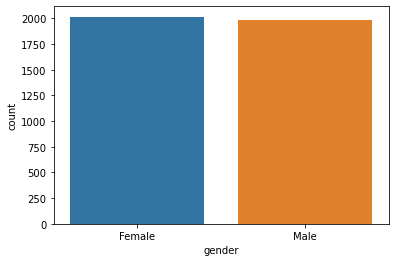

In [24]:
sns.countplot(x=y_train)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

In [25]:
df_train = X_train.join(y_train)

df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)

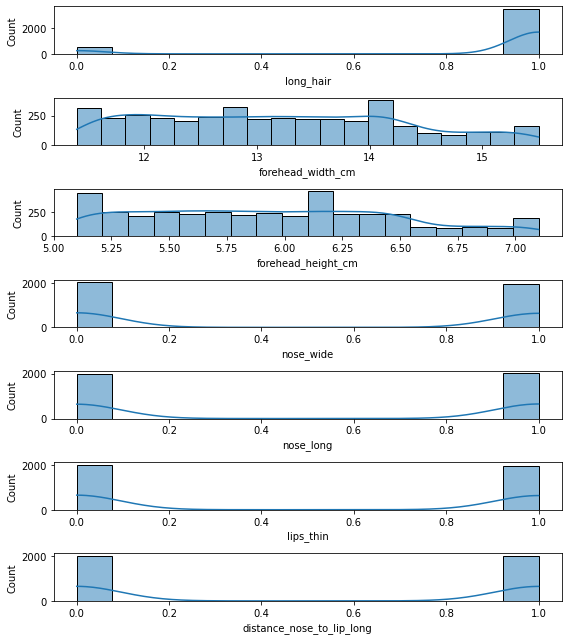

In [26]:
fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(8, 9))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

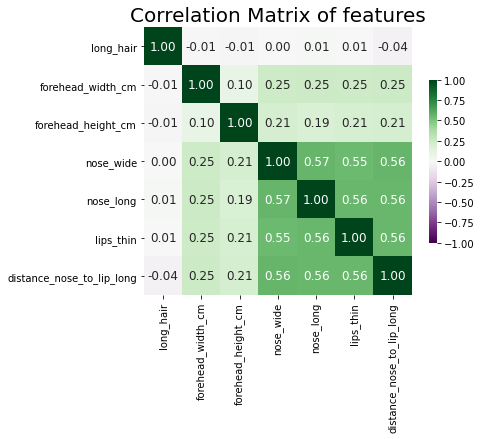

In [27]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(6, 6))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Эксперименты с моделями

- Можно использовать любое количество признаков.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Провести эксперименты на всех изученных моделях.
    - Попробовать разные модели.
    - Попробовать различные параметры `scoring` для `GridSearch`.
    - Результаты экспериментов желательно собрать в одну таблицу и по возможности визуализировать (`heatmap`, `confusion_matrix`).
- Проанализировать результаты (различные метрики). Написать выводы.

In [64]:
y_train

4111    Female
2370    Female
3447    Female
2826    Female
588     Female
         ...  
4802      Male
4554    Female
4776    Female
4141    Female
2596      Male
Name: gender, Length: 4000, dtype: object

In [69]:
y_train_enc = LabelEncoder().fit_transform(y_train)
y_train_enc

array([0, 0, 0, ..., 0, 0, 1])

In [78]:
y_test_enc = LabelEncoder().fit_transform(y_test)
y_test_enc

array([0, 1, 1, ..., 1, 0, 1])

In [35]:
num_cols = ['forehead_width_cm', 'forehead_height_cm']
bin_cols = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('passthrough', 'passthrough', bin_cols),
])

In [36]:
gs_scoring = ['roc_auc', 
              'recall', 
              'precision', 
              'f1', 
              'balanced_accuracy', 
              'accuracy']

In [71]:
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, 
                               {'model__max_depth': [5, 7],
                                'model__criterion': ['gini', 'entropy']}),
    
    'LogisticRegression': (LogisticRegression, 
                           {'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}),
    
    'SVC': (SVC, 
            {'model__degree': [2, 3, 4]}),
    
    'KNeighborsClassifier': (KNeighborsClassifier, 
                             {'model__n_neighbors': [4, 5, 6], 
                              'model__weights': ['uniform', 'distance']})
}

In [72]:
import time

total = len(models) * len(gs_scoring)
index = 1
experiments = {}

for name, (model, param_grid) in models.items():
    experiments[name] = {}
    for scoring in gs_scoring:
        start = time.time()
        pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', model())
        ])
        
        print(f"{name} | {scoring} ...", end=' ')
        
        model_gs = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring)
        model_gs.fit(X_train, y_train_enc)
        
        experiments[name].update({scoring: model_gs})
        end = time.time()

        print(f"finished! ({end - start:0.2f}s) {index}/{total}")
        index += 1
    print()

DecisionTreeClassifier | roc_auc ... finished! (1.31s) 1/24
DecisionTreeClassifier | recall ... finished! (0.15s) 2/24
DecisionTreeClassifier | precision ... finished! (0.16s) 3/24
DecisionTreeClassifier | f1 ... finished! (0.17s) 4/24
DecisionTreeClassifier | balanced_accuracy ... finished! (0.15s) 5/24
DecisionTreeClassifier | accuracy ... finished! (0.18s) 6/24

LogisticRegression | roc_auc ... finished! (0.30s) 7/24
LogisticRegression | recall ... finished! (0.24s) 8/24
LogisticRegression | precision ... finished! (0.27s) 9/24
LogisticRegression | f1 ... finished! (0.32s) 10/24
LogisticRegression | balanced_accuracy ... finished! (0.30s) 11/24
LogisticRegression | accuracy ... finished! (0.30s) 12/24

SVC | roc_auc ... finished! (0.58s) 13/24
SVC | recall ... finished! (0.50s) 14/24
SVC | precision ... finished! (0.49s) 15/24
SVC | f1 ... finished! (0.56s) 16/24
SVC | balanced_accuracy ... finished! (0.48s) 17/24
SVC | accuracy ... finished! (0.48s) 18/24

KNeighborsClassifier | ro

## Анализ результатов

In [74]:
columns = ['accuracy', 'b_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [75]:
def evaluate_model(y_predicted, X_test, y_test):       
    accuracy = accuracy_score(y_test, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    roc_auc = roc_auc_score(y_test, y_predicted)
    
    return pd.Series([accuracy, balanced_accuracy, precision, recall, f1, roc_auc], 
                     index=columns)



plot matrix: 6x4


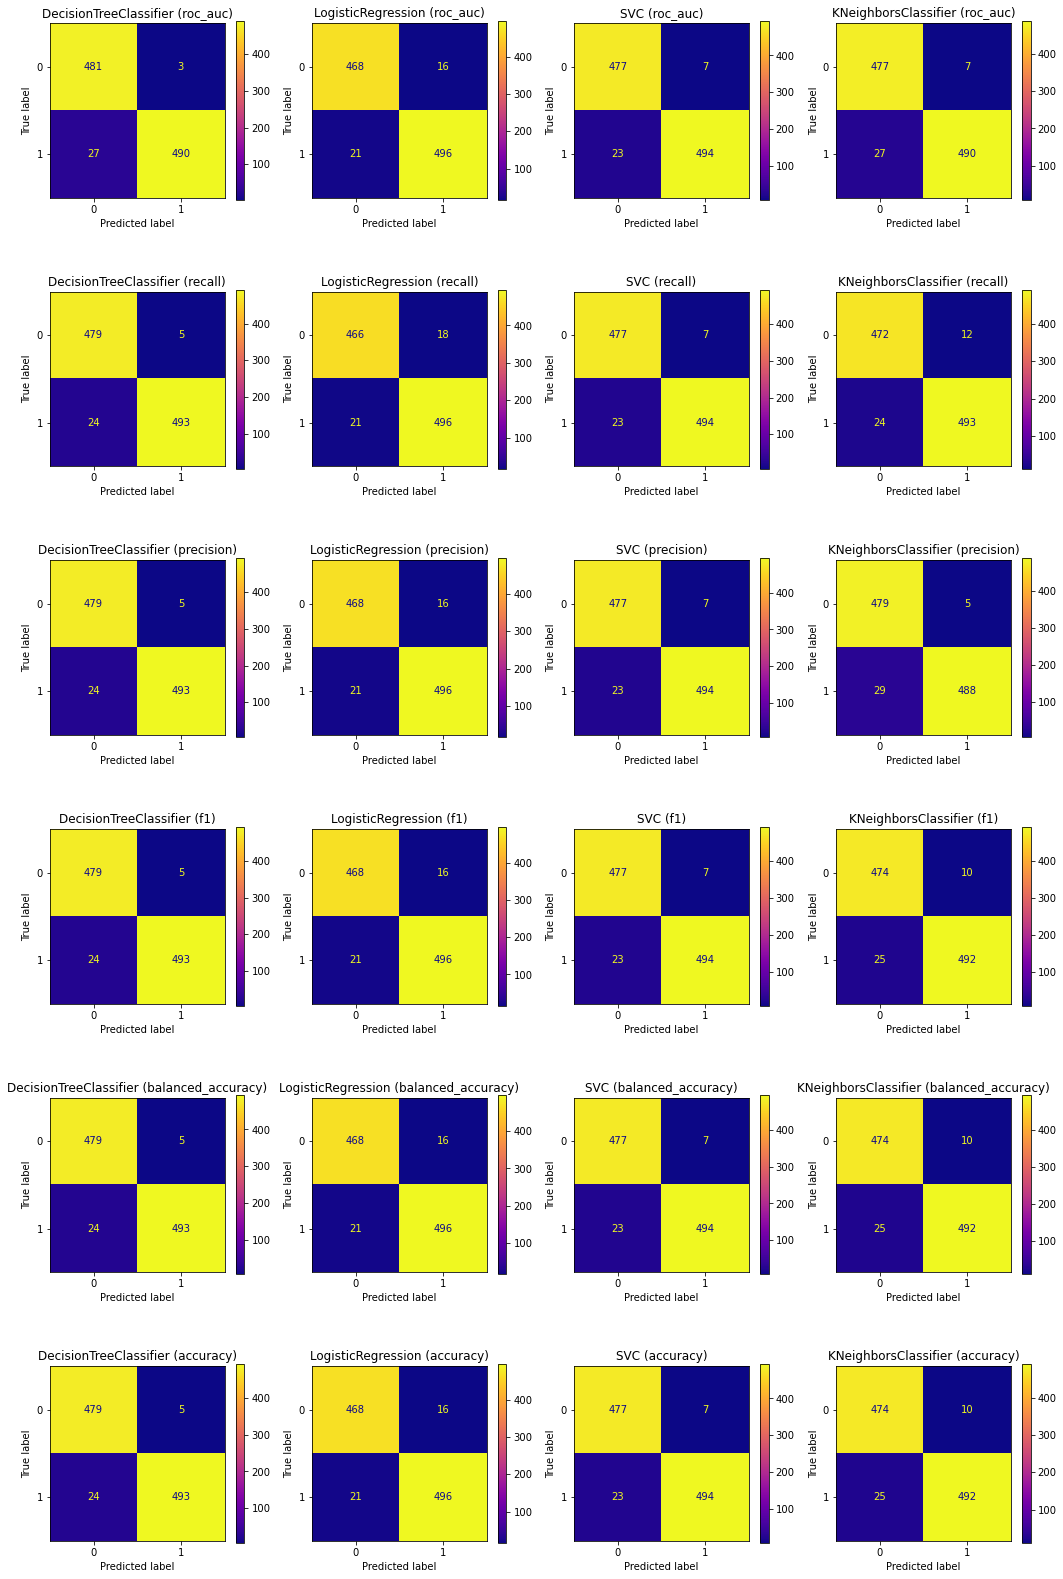

In [93]:
eval_df = pd.DataFrame(columns=columns)
name_scorer_index = []

names_len = len(models)
scorers_len = len(gs_scoring)
fig, axes = plt.subplots(scorers_len, names_len, figsize=(scorers_len*3, names_len*7))

for name_index, (name, models_by_scorer) in enumerate(experiments.items()):
    for scorer_index, (scorer, model) in enumerate(models_by_scorer.items()):
        name_scorer_index.append((name, scorer))

        y_predicted = model.predict(X_test)
        ax=axes[scorer_index][name_index]
        plot_confusion_matrix(model, X_test, y_test_enc, ax=ax, cmap='plasma')
        ax.set_title(f'{name} ({scorer})')
        
        eval_res = evaluate_model(y_predicted, X_test, y_test_enc)        
        eval_df = eval_df.append(eval_res, ignore_index=True)
        
index = pd.MultiIndex.from_tuples(name_scorer_index, names=["name", "scorer"])
eval_df.set_index(index, inplace=True)

print(f'\n\nplot matrix: {scorers_len}x{names_len}')

# расстояние между графиками по горизонтали и вертикали
fig.subplots_adjust(hspace=0.5, wspace=0.2)

In [81]:
eval_df

accuracy  b_accuracy  precision  \
name                   scorer                                               
DecisionTreeClassifier roc_auc            0.970030    0.970789   0.993915   
                       recall             0.971029    0.971624   0.989960   
                       precision          0.971029    0.971624   0.989960   
                       f1                 0.971029    0.971624   0.989960   
                       balanced_accuracy  0.971029    0.971624   0.989960   
                       accuracy           0.971029    0.971624   0.989960   
LogisticRegression     roc_auc            0.963037    0.963162   0.968750   
                       recall             0.961039    0.961095   0.964981   
                       precision          0.963037    0.963162   0.968750   
                       f1                 0.963037    0.963162   0.968750   
                       balanced_accuracy  0.963037    0.963162   0.968750   
                       accuracy           0.963037    0.963162   0.968750   
SVC                    roc_auc            0.970030    0.970525   0.986028   
                       recall             0.970030    0.970525   0.986028   
                       precision          0.970030    0.970525   0.986028   
                       f1                 0.970030    0.970525   0.986028   
                       balanced_accuracy  0.970030    0.970525   0.986028   
                       accuracy           0.970030    0.970525   0.986028   
KNeighborsClassifier   roc_auc            0.966034    0.966656   0.985915   
                       recall             0.964036    0.964392   0.976238   
                       precision          0.966034    0.966788   0.989858   
                       f1                 0.965035    0.965491   0.980080   
                       balanced_accuracy  0.965035    0.965491   0.980080   
                       accuracy           0.965035    0.965491   0.980080   

                                            recall        f1   roc_auc  
name                   scorer                                           
DecisionTreeClassifier roc_auc            0.947776  0.970036  0.970789  
                       recall             0.953578  0.971037  0.971624  
                       precision          0.953578  0.971037  0.971624  
                       f1                 0.953578  0.971037  0.971624  
                       balanced_accuracy  0.953578  0.971037  0.971624  
                       accuracy           0.953578  0.971037  0.971624  
LogisticRegression     roc_auc            0.959381  0.963042  0.963162  
                       recall             0.959381  0.961042  0.961095  
                       precision          0.959381  0.963042  0.963162  
                       f1                 0.959381  0.963042  0.963162  
                       balanced_accuracy  0.959381  0.963042  0.963162  
                       accuracy           0.959381  0.963042  0.963162  
SVC                    roc_auc            0.955513  0.970038  0.970525  
                       recall             0.955513  0.970038  0.970525  
                       precision          0.955513  0.970038  0.970525  
                       f1                 0.955513  0.970038  0.970525  
                       balanced_accuracy  0.955513  0.970038  0.970525  
                       accuracy           0.955513  0.970038  0.970525  
KNeighborsClassifier   roc_auc            0.947776  0.966043  0.966656  
                       recall             0.953578  0.964045  0.964392  
                       precision          0.943907  0.966041  0.966788  
                       f1                 0.951644  0.965044  0.965491  
                       balanced_accuracy  0.951644  0.965044  0.965491  
                       accuracy           0.951644  0.965044  0.965491

<AxesSubplot:ylabel='name-scorer'>

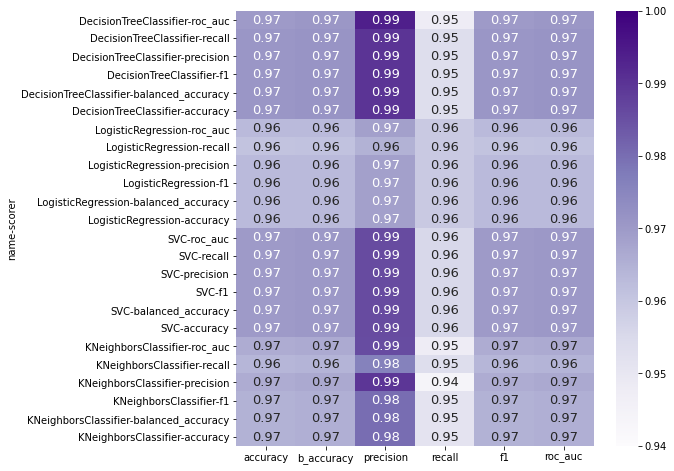

In [97]:
plt.figure(figsize=(8, 8))
sns.heatmap(eval_df, 
            annot=True, 
            annot_kws={"size": 13}, 
            fmt="1.2f", 
            cmap='Purples', 
            vmin=0.94, 
            vmax=1)

In [98]:
import joblib

joblib.dump(models['DecisionTreeClassifier']['recall'], './tmp/example_model_dtc_recall.joblib')

TypeError: tuple indices must be integers or slices, not str